In [199]:
import matplotlib as mpl
from matplotlib import pyplot as plt
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12}
mpl.rc('font', **font)

import numpy as np
import numpy.linalg as la
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.5g" % x))

import os
import sympy as sy
import pandas as pd

save_path = r'C:\Users\reape\Desktop\Sp24\NPRE 349\Hw9\\'

In [7]:
#Importing Data
data_path = r'C:\Users\reape\Desktop\Sp24\NPRE 349\Hw9\hw9_data.xlsx'
data = np.array(pd.read_excel(data_path, sheet_name='Refined Data', header=1))
t, T = data[:,0], data[:,1]
Te = T - 100

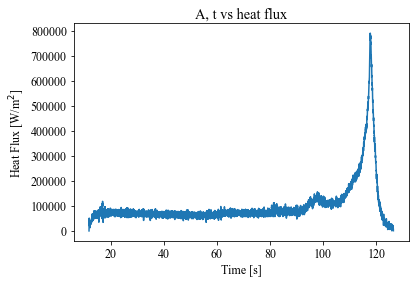

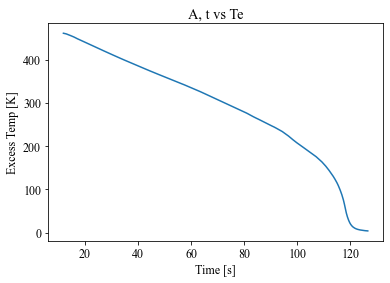

In [203]:
#Part A

#Properties
rho, cp, D = 8933, 385, 4.43e-2
V = 4/3*np.pi*(D/2)**3
A = 4*np.pi*(D/2)**2

#Change in Te and q"
dTdt = [0]
for i in range(len(Te)-1):
    dTdt.append((Te[i]-Te[i+1])/(t[i]-t[i+1]))

heat_flux = -rho*V/A*cp*np.array(dTdt)

#Plotting
plt.plot(t, heat_flux)
plt.xlabel('Time [s]'), plt.ylabel('Heat Flux [W/m${^2}$]')
plt.title('A, t vs heat flux')
plt.savefig(save_path+'a_t_vs_hf', dpi=600)
plt.show()

plt.plot(t, Te)
plt.xlabel('Time [s]'), plt.ylabel('Excess Temp [K]')
plt.title('A, t vs Te')
plt.savefig(save_path+'a_t_vs_Te', dpi=600)
plt.show()

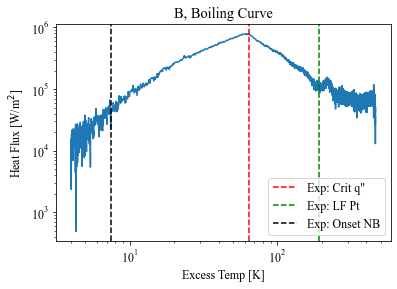

Onset of NB: Te, q"


7.48898862461499

45281.59984908007


Critical Heat Flux: Te, q"


64.26651817150659

790622.763504219


Leidenfrost Point: Te, q"


192.77909916510805

130994.22581174804

In [207]:
#Part B

#Finding Transition Indices
max_q_index = np.where(heat_flux == np.max(heat_flux))[0][0]

leidenfrost_index = 0
for i in range(4500, 4600):
    if heat_flux[i] > heat_flux[leidenfrost_index]: leidenfrost_index = i

onset_nb_index = 5550

#Plotting
plt.loglog(Te[3:-3],heat_flux[3:-3])
plt.axvline(Te[max_q_index], label='Exp: Crit q"', color='r', linestyle='--')
plt.axvline(Te[leidenfrost_index], label='Exp: LF Pt', color='g', linestyle='--')
plt.axvline(Te[onset_nb_index], label='Exp: Onset NB', color='k', linestyle='--')
plt.xlabel('Excess Temp [K]'), plt.ylabel('Heat Flux [W/m$^{2}$]')
plt.title('B, Boiling Curve')
plt.legend()
plt.savefig(save_path+'b_boiling curve', dpi=600)
plt.show()


#Outputting Values
print('Onset of NB: Te, q"')
display(Te[onset_nb_index], heat_flux[onset_nb_index])

print('\nCritical Heat Flux: Te, q"')
display(Te[max_q_index], heat_flux[max_q_index])

print('\nLeidenfrost Point: Te, q"')
display(Te[leidenfrost_index], heat_flux[leidenfrost_index])

In [176]:
#Average Temps in Each Region
T1_avg = np.mean(Te[onset_nb_index:])
T2_avg = np.mean(Te[max_q_index:onset_nb_index])
T4_avg = np.mean(Te[:leidenfrost_index])

np.array([T1_avg, T2_avg, T4_avg]) + 373.15

array([378.52, 396.86, 711.18])

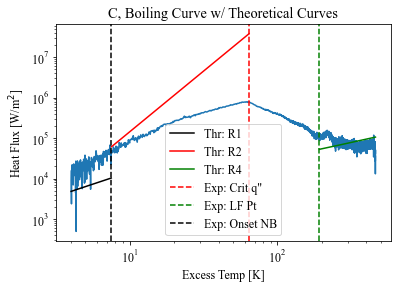

In [208]:
#Part C
r = 1/2*4.43e-2
D = 2*r
Lc = r/3
g = 9.81

#Free Convection
beta = 750.1e-6
muf = 279e-6
vf = 1.044e-3
nu = muf * vf
Pr = 1.76
kf = 680e-3

Ra = (g*beta*(Te[onset_nb_index:])*Lc**3/nu**2)*Pr
Nu = 2 + 0.589*Ra**(1/4)/(1+(0.469/Pr)**(9/16))**(4/9)
h = kf*Nu/Lc

heat_flux_r1 = h*Te[onset_nb_index:]

#Onset Nucleate Boiling
Csf = 0.0128
n = 1
muf = 279e-6
hfg = 2257e3
rhol = 1/(1.044e-3)
rhog = 1/.731
sigma = 58.9e-3
cpl = 4217
Pr = 1.76

q1 = (g*(rhol-rhog)/sigma)**(1/2)
q2 = (cpl*Te[max_q_index:onset_nb_index]/Csf/hfg/Pr)**3
heat_flux_r2 = muf*hfg*q1*q2

#Vapor Film Boiling
kv = 50.3e-3
rhov = 0.314
nuv = 77.26e-6
hfg = 2257e3
cpv = 2029
C = 0.67

hfgp = hfg + 0.8*cpv*Te[:leidenfrost_index]
h = kv/Lc*C*(g*(rhol-rhov)*hfgp*Lc**3/nuv/kv/Te[:leidenfrost_index])**(1/4)
heat_flux_r4 = h*Te[:leidenfrost_index]

#Plotting
plt.loglog(Te[3:-3],heat_flux[3:-3])
plt.loglog(Te[onset_nb_index:], heat_flux_r1, label='Thr: R1', color='k')
plt.loglog(Te[max_q_index:onset_nb_index], heat_flux_r2, label='Thr: R2', color='r')
plt.loglog(Te[:leidenfrost_index], heat_flux_r4, label='Thr: R4', color='green')

plt.axvline(Te[max_q_index], label='Exp: Crit q"', color='r', linestyle='--')
plt.axvline(Te[leidenfrost_index], label='Exp: LF Pt', color='g', linestyle='--')
plt.axvline(Te[onset_nb_index], label='Exp: Onset NB', color='k', linestyle='--')
plt.xlabel('Excess Temp [K]'), plt.ylabel('Heat Flux [W/m$^{2}$]')
plt.legend()
plt.title('C, Boiling Curve w/ Theoretical Curves')
plt.savefig(save_path+'c_bc with theory', dpi=600)
plt.show()

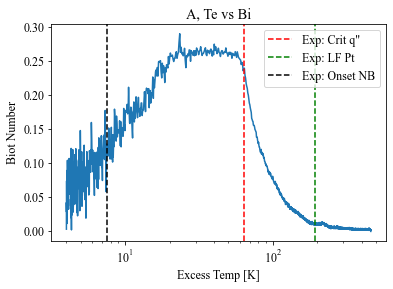

In [205]:
#Biot Number
k = 379

h = heat_flux/Te
Bi = h/k*Lc

plt.semilogx(Te, Bi)
plt.axvline(Te[max_q_index], label='Exp: Crit q"', color='r', linestyle='--')
plt.axvline(Te[leidenfrost_index], label='Exp: LF Pt', color='g', linestyle='--')
plt.axvline(Te[onset_nb_index], label='Exp: Onset NB', color='k', linestyle='--')
plt.xlabel('Excess Temp [K]'), plt.ylabel('Biot Number')
plt.legend()
plt.title('A, Te vs Bi')
plt.savefig(save_path+'a_t_Bi', dpi=600)
plt.show()

In [197]:
#Part D
C = np.pi/24
rhol = 1/1.067e-3
hfg = 2183e3
sigma = 53.6e-3
rhov = 1/0.731

#q" max
zuber_max = C*hfg*rhov*(sigma*g*(rhol-rhov)/rhov**2)**(1/4)
zuber_min = C*rhov*hfg*(sigma*g*(rhol-rhov)/(rhol+rhov)**2)**(1/4)

print('Zuber Max Heat Flux')
print(zuber_max)
print('Experimental Max Heat Flux:')
print(heat_flux[max_q_index])
print('\n')
print('Zuber Min Heat Flux')
print(zuber_min)
print('Experimental Min Heat Flux:')
print(heat_flux[leidenfrost_index])

Zuber Max Heat Flux
1574136.6407207544
Experimental Max Heat Flux:
790622.763504219


Zuber Min Heat Flux
60096.505950424624
Experimental Min Heat Flux:
130994.22581174804
